In [1]:
# read this into a dataframe: trrust_mock_MYC_init_conds_001.parquet
import pandas as pd

df = pd.read_parquet('trrust_mock_MYC_init_conds_001.parquet')
df

,CCND2,CDKN1A,MYC,InitCondNum
0,0.000200,0.085200,117.894196,1
1,0.104500,0.009000,145.006790,2
2,0.108400,1.480100,62.104000,3
3,0.404100,0.103500,0.076400,4
4,0.377500,0.050600,44.801998,5
5,2.039600,0.468500,2.228400,6
6,0.003000,0.006700,208.184891,7
7,2.925900,2.449900,134.459396,8
8,21.537699,5.765500,4.402300,9
9,0.156900,397.928101,3.112000,10


In [2]:
df = pd.read_parquet('trrust_mock_MYC_params_001.parquet')
df

,Prod_CCND2,Prod_CDKN1A,Deg_CCND2,Deg_CDKN1A,ParamNum
0,1.000000,68.800618,0.613295,1.000000,1
1,67.056531,59.924768,0.684532,0.881940,2
2,20.678468,51.433544,0.459736,0.269881,3
3,34.067137,86.147335,0.100000,0.943126,4
4,27.140384,1.000000,0.712657,0.100000,5
5,100.000000,23.495729,0.537611,0.371560,6
6,6.409928,10.703067,0.978890,0.176674,7
7,59.503028,98.162897,0.850857,0.498511,8
8,55.838656,79.452860,1.000000,0.777869,9
9,36.055820,100.000000,0.542115,0.250776,10


In [10]:
# read AR_0.pt
import torch    
ar_0 = torch.load('AHR_0.pt', weights_only=False)
ar_0

Data(
  original=[500],
  perturbed=[500],
  difference=[500],
  binary_perturbation_indicator=[500],
  perturbed_gene='AHR',
  gene_mapping={
    ABHD5=0,
    ADNP=1,
    AHR=2,
    AR=3,
    ARID2=4,
    ARID3A=5,
    ARNT=6,
    ARX=7,
    ASCL1=8,
    ATF1=9,
    ATF2=10,
    ATF3=11,
    ATF4=12,
    ATF5=13,
    ATF6=14,
    ATF7=15,
    ATOH1=16,
    BACH1=17,
    BACH2=18,
    BARX2=19,
    BATF=20,
    BCL11A=21,
    BCL6=22,
    BHLHE22=23,
    BHLHE40=24,
    BMAL1=25,
    BPTF=26,
    BRF2=27,
    BTBD8=28,
    CARF=29,
    CBX2=30,
    CCDC12=31,
    CCL21=32,
    CCT5=33,
    CDH8=34,
    CDR2=35,
    CDX1=36,
    CDX2=37,
    CEBPA=38,
    CEBPB=39,
    CEBPD=40,
    CEBPE=41,
    CEBPG=42,
    CEBPZ=43,
    CHAF1A=44,
    CLCA4=45,
    CLOCK=46,
    CREB1=47,
    CREB3=48,
    CREB3L1=49,
    CREB5=50,
    CREM=51,
    CRX=52,
    CTCF=53,
    CTCFL=54,
    CUX1=55,
    CXXC4=56,
    DACH1=57,
    DCAF12L2=58,
    DDIT3=59,
    DEAF1=60,
    DLX5=61,
    DMTF1=62,
    D

Original min: 0.0
Original max: 593.099365234375
Perturbed min: 0.0
Perturbed max: 593.099365234375
Original min (no zeros): 10.029799461364746
Original max (no zeros): 593.099365234375
Perturbed min (no zeros): 10.294099807739258
Perturbed max (no zeros): 593.099365234375


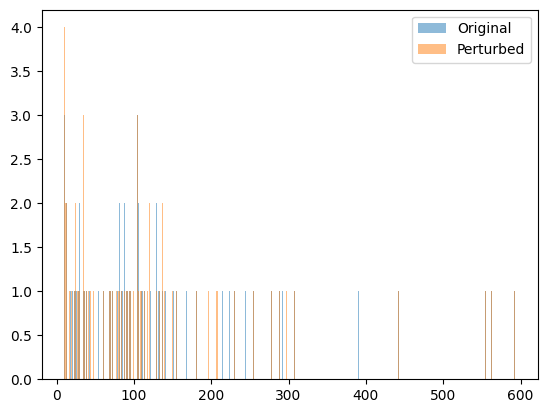

In [23]:
# access Data(original)
ar_0_pert = ar_0.perturbed
ar_0_og = ar_0.original
# print min and max of original and perturbed
print("Original min:", min(ar_0_og.flatten().tolist()))
print("Original max:", max(ar_0_og.flatten().tolist()))
print("Perturbed min:", min(ar_0_pert.flatten().tolist()))
print("Perturbed max:", max(ar_0_pert.flatten().tolist()))
# remove all zeros
ar_0_og = ar_0_og[ar_0_og > 10]
ar_0_pert = ar_0_pert[ar_0_pert > 10]
# print min and max of original and perturbed after removing zeros
print("Original min (no zeros):", min(ar_0_og.flatten().tolist()))
print("Original max (no zeros):", max(ar_0_og.flatten().tolist()))
print("Perturbed min (no zeros):", min(ar_0_pert.flatten().tolist()))
print("Perturbed max (no zeros):", max(ar_0_pert.flatten().tolist()))
# for both plot a histogram
import matplotlib.pyplot as plt
plt.hist(ar_0_og.flatten().tolist(), bins=500, alpha=0.5, label='Original')
plt.hist(ar_0_pert.flatten().tolist(), bins=500, alpha=0.5, label='Perturbed')
plt.legend()
plt.show()